In [ ]:
%pip install requests bs4 pandas skßlearn matplotlib scikit-learn lxml

/var/folders/zt/5fsp7hls50j19mwr4gzz8vcxz8nv6r/T/ipykernel_75372/69542931.py:18: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  stats_df = pd.read_html(str(stats_table))[0]


0     04
1     05
2     06
3     07
4     08
5     09
6     10
7     11
8     12
9     13
10    14
11    15
12    16
13    17
14    18
15    19
16    20
17    21
18    22
19    23
20    24
Name: Season, dtype: object


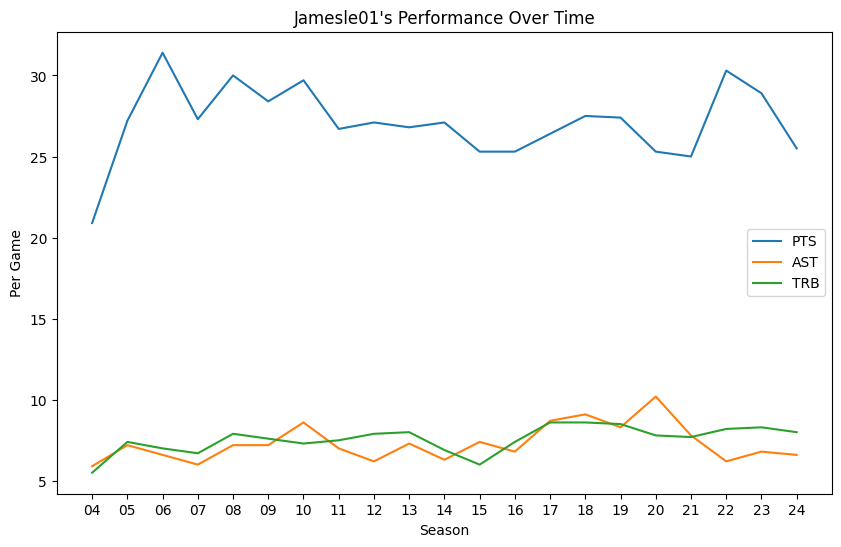

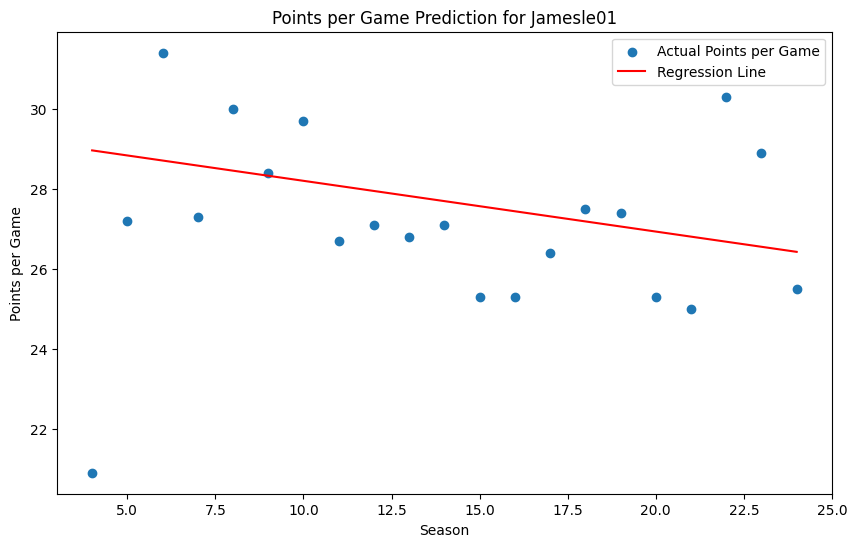

In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Function to scrape player statistics from Basketball-Reference
def scrape_player_stats(player_name):
    url = f'https://www.basketball-reference.com/players/{player_name[0]}/{player_name}.html'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Extract relevant statistics
    # Example: Points per game (PPG), Assists per game (APG), etc.
    # Modify as per the structure of the website you're scraping
    stats_table = soup.find('table', {'id': 'per_game'})
    stats_df = pd.read_html(str(stats_table))[0]
    
    return stats_df

# Example player: LeBron James
player_name = 'jamesle01'

# Scrape player statistics
player_stats = scrape_player_stats(player_name)
player_stats = player_stats.iloc[0:21,]

for i in range(21):
   player_stats.loc[i,'Season']= str(player_stats.loc[i,'Season'])[-2:]
# player_stats['Season'] = player_stats['Season'][-3:]
print(player_stats['Season'])



# Visualize performance metrics over time
plt.figure(figsize=(10, 6))
for col in ['PTS', 'AST', 'TRB']:  # Example metrics: Points, Assists, Rebounds
  plt.plot(player_stats['Season'], player_stats[col], label=col)

plt.title(f'{player_name.capitalize()}\'s Performance Over Time')
plt.xlabel('Season')
plt.ylabel('Per Game')
plt.legend()
plt.show()

# Prepare data for regression
X = player_stats['Season'].str[:4].astype(int).values.reshape(-1, 1)
y = player_stats['PTS'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Visualize the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Actual Points per Game')
plt.plot(X, model.predict(X), label='Regression Line', color='red')
plt.title(f'Points per Game Prediction for {player_name.capitalize()}')
plt.xlabel('Season')
plt.ylabel('Points per Game')
plt.legend()
plt.show()